# TP 2 - Procesamiento del Lenguaje Natural

## Librerias

In [277]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.preprocessing import DenseTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [278]:
df = pd.read_csv('train.csv', sep=',')
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


In [279]:
df.shape

(50000, 3)

In [280]:
df_test = pd.read_csv('test.csv', sep=',')
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [281]:
def mostrar_scores(y_test: np.ndarray, y_prediccion: np.ndarray):
    accuracy = accuracy_score(y_test,y_prediccion)
    recall = recall_score(y_test,y_prediccion)
    f1 = f1_score(y_test,y_prediccion,)
    precision = precision_score(y_test,y_prediccion)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

### Preprocesamiento

In [307]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df_preprocesado = df.copy()
#nltk.download('stopwords')
#nltk.download('punkt')

stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zñáéíóúü\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df_preprocesado['review_es'] = df_preprocesado['review_es'].apply(preprocess_text)

In [283]:
df_preprocesado.head(10)

,ID,review_es,sentimiento
0,0,críticos mencionado después ver solo oz episod...,positivo
1,1,pequeña pequeña producciónla técnica filmación...,positivo
2,2,pensé manera maravillosa pasar tiempo fin sema...,positivo
3,3,básicamente familia niño pequeño jake piensa z...,negativo
4,4,amor tiempo petter mattei película visualmente...,positivo
5,5,probablemente película favorita tiempos histor...,positivo
6,6,seguro gustaría ver resurrección serie seahunt...,positivo
7,7,espectáculo idea increíble fresca innovadora a...,negativo
8,8,alentados comentarios positivos película aquí ...,negativo
9,9,si gusta risa original desgarradora gustará pe...,positivo


In [284]:
x_train, x_test, y_train, y_test = train_test_split(
                                          df['review_es'], df['sentimiento'], 
                                          test_size=0.3, random_state=42)

### Modelos de Bayes Naïve

##### Vamos a probar en primer lugar con un count vectorizer y luego con un tfidf vectorizer par ver con cual obtenemos merjores resultados

In [285]:
modelo_count = make_pipeline(CountVectorizer(), MultinomialNB())
modelo_tfidf = Pipeline([('tvec', TfidfVectorizer()), ('mnb',MultinomialNB())])

##### Count vectorizer

In [286]:
modelo_count.fit(x_train, y_train)

prediccion = modelo_count.predict(x_test)

# mostrar_scores(y_test, prediccion)

In [287]:
modelo_tfidf.fit(x_train, y_train)

prediccion = modelo_tfidf.predict(x_test)

# mostrar_scores(y_test, prediccion)

In [288]:
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(max_features=7000)
modelo_tfidf = make_pipeline(vectorizer, MultinomialNB(alpha=0.5))
modelo_tfidf.fit(X_train, y_train)

prediccion = modelo_tfidf.predict(X_test)

mostrar_scores(y_test, prediccion)

Accuracy: 0.8277333333333333
Recall: 0.8381868493872711
Precision: 0.8242840482052611
f1 score: 0.8311773160851954


In [289]:
prediccion_train = modelo_tfidf.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.8460857142857143
Recall: 0.8575038768594566
Precision: 0.837071092173133
f1 score: 0.8471642976707238


In [292]:
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(max_features=7000)
modelo_gauss = make_pipeline(vectorizer,   DenseTransformer() ,GaussianNB())
modelo_gauss.fit(X_train, y_train)

prediccion = modelo_gauss.predict(X_test)

mostrar_scores(y_test, prediccion)

Accuracy: 0.7766666666666666
Recall: 0.7663723810778759
Precision: 0.7866901122683619
f1 score: 0.7763983446802829


In [293]:
prediccion_train = modelo_gauss.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.8185714285714286
Recall: 0.8056401125725117
Precision: 0.8254575413405519
f1 score: 0.8154284385536564


In [294]:
df_test = pd.read_csv('test.csv', sep=',')
df_test_procesado = df_test.copy()

prediccion = modelo_tfidf.predict(df_test_procesado['review_es'].apply(preprocess_text))
prediccion = np.where(prediccion == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()


df_entrega['sentimiento'] = prediccion
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('entrega.csv', index=False)

### XGBoost

In [295]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_preprocesado['review_es'])
df_preprocesado['sentimiento'] = df_preprocesado['sentimiento'].map({'negativo': 0, 'positivo': 1})

X_train, X_test, y_train, y_test = train_test_split(X, df_preprocesado['sentimiento'], test_size=0.3, random_state=42)

modelo_xg_boost = XGBClassifier(
    learning_rate=0.01,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)
modelo_xg_boost.fit(X_train, y_train)

y_pred = modelo_xg_boost.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, modelo_xg_boost.predict(X_train))
print(f'F1_score train: {f1_train}')


F1_score: 0.7480124438299343
F1_score train: 0.7492442601244161


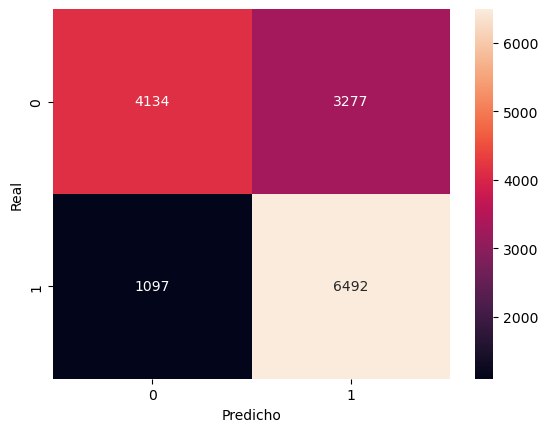

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


### Predicción en los datos de test

In [297]:
df_test_copia = df_test.copy()
X = vectorizer.transform(df_test_copia['review_es'])

prediccion = modelo_xg_boost.predict(X)
prediccion = np.where(prediccion == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()

df_entrega['sentimiento'] = prediccion
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('entrega.csv', index=False)

### Red Neuronal

In [308]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.layers import Dense, Input, Dropout
import os

np.random.seed(1)
tf.random.set_seed(1)
keras.utils.set_random_seed(812)
os.environ['PYTHONHASHSEED']=str(1)


df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = tf.keras.Model(inputs=inputs,outputs=layer)
    return model

model_rnn = RNN()
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.fit(sequences_matrix, y_train, batch_size=128, epochs=100, 
            validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

accr = model_rnn.evaluate(test_sequences_matrix, y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

prediccion = model_rnn.predict(test_sequences_matrix)
prediccion = np.where(prediccion >= 0.5, 1, 0)
mostrar_scores(y_test, prediccion)
prediccion = np.where(prediccion == 1, 'positivo', 'negativo')


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (/Users/juampi/anaconda3/lib/python3.11/site-packages/keras/preprocessing/sequence.py)

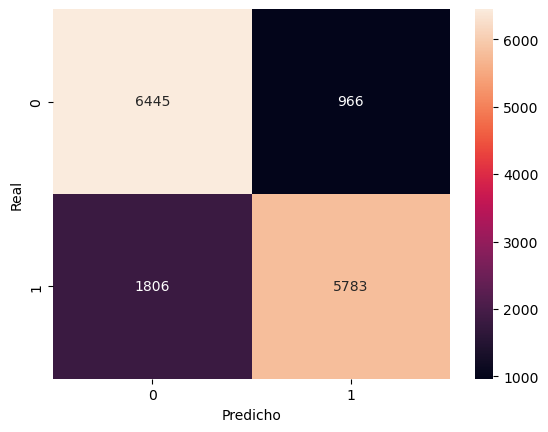

In [304]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

prediccion_heatmap = np.where(prediccion == 'positivo', 1, 0)

tabla = confusion_matrix(y_test, prediccion_heatmap)
sns.heatmap(tabla, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_len)
prediccion_train = model_rnn.predict(train_sequences_matrix)
prediccion_train = np.where(prediccion_train >= 0.5, 1, 0)
mostrar_scores(y_train, prediccion_train)

1094/1094 [==============================] - 25s 23ms/step
Accuracy: 0.8404285714285714
Recall: 0.8960427316064556
Precision: 0.8051713459950454
f1 score: 0.8481800636094272


### Prediccion en los datos de test

In [ ]:
df_test = pd.read_csv('test.csv', sep=',')
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [ ]:
df_test_copia = df_test.copy()

train_sequences = tok.texts_to_sequences(df_test_copia['review_es'])
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_len)
prediccion_final = model_rnn.predict(train_sequences_matrix)
prediccion_final = np.where(prediccion_final >= 0.5, 'positivo', 'negativo')

df_entrega = df_test.copy()

df_entrega['sentimiento'] = prediccion_final
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('entrega.csv', index=False)

269/269 [==============================] - 6s 24ms/step
